In [1]:
'''Mitigating Noise in measurement'''
from qiskit import *

In [2]:
nqubits = 3
circuit = QuantumCircuit(nqubits,nqubits)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2],[0,1,2])

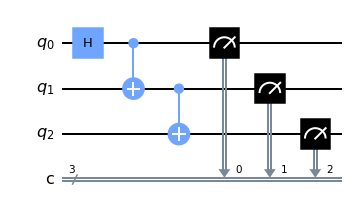

In [3]:
%matplotlib inline
circuit.draw(output='mpl')

In [4]:
simulator = Aer.get_backend('qasm_simulator')
sim_result = execute(circuit,simulator, shots=2048).result()

In [5]:
from qiskit.tools.visualization import plot_histogram

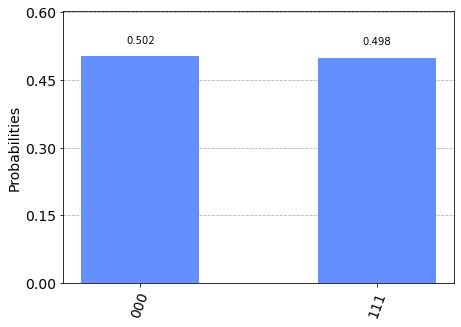

In [6]:
plot_histogram(sim_result.get_counts())

In [7]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
device = provider.get_backend('ibmqx2')

C:\Users\Victor\anaconda3\envs\qiskit\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [8]:
job =execute(circuit,device, shots=2048)
print(job.job_id())
from qiskit.tools.monitor import  job_monitor
job_monitor(job)

5fe20bc62b19e90019e40284
Job Status: job has successfully run


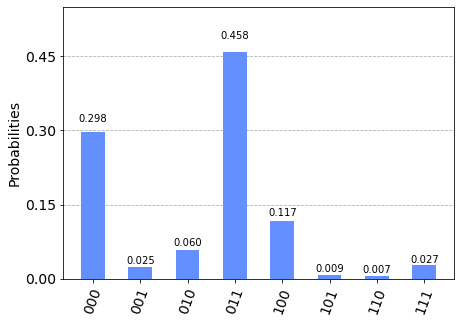

In [9]:
device_result = job.result()
plot_histogram(device_result.get_counts(circuit))

In [10]:
#Unucky?
from qiskit.ignis.mitigation import (complete_meas_cal, CompleteMeasFitter)

In [11]:
cal_circuits , state_labels = complete_meas_cal(qr=circuit.qregs[0], circlabel= 'measerrormitigationcal')

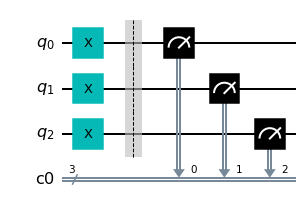

In [16]:
cal_circuits[0].draw(output='mpl')
cal_circuits[1].draw(output='mpl')
cal_circuits[7].draw(output='mpl')

In [17]:
cal_job=execute(cal_circuits,
               backend = device,
               shots = 2048,
               optimization_level = 0
               )
print(cal_job.job_id())
job_monitor(cal_job)
cal_results= cal_job.result()


5fe20c935af4a7001a2f8c38
Job Status: job has successfully run


In [ ]:
plot_historam(cal_jobs)

In [26]:
len(cal_results.get_counts())
#Runs each possible input in an actual qc and measures the error genreated 

8

In [27]:
meas_fitter = CompleteMeasFitter(cal_results,state_labels)

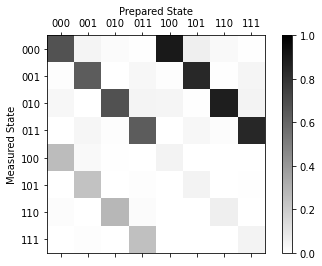

In [28]:
meas_fitter.plot_calibration()

In [30]:
meas_filter = meas_fitter.filter

In [31]:
mitigated_result = meas_filter.apply(device_result)

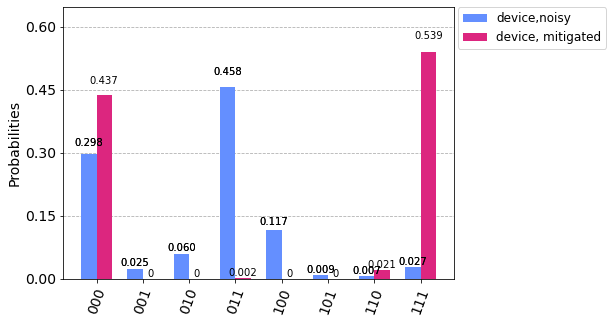

In [32]:
deivce_counts = device_result.get_counts()
mitigated_counts = mitigated_result.get_counts()
plot_histogram([deivce_counts, mitigated_counts], legend=['device,noisy','device, mitigated'])

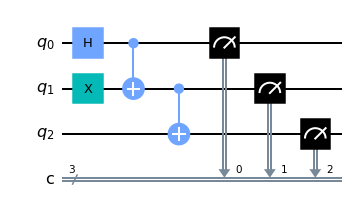

In [33]:
#This worked extremely well but did we just get unlucky
#Also aren't we borderline tampering with the data?
circuit2 = QuantumCircuit(3,3)
circuit2.x(1)
circuit2.h(0)
circuit2.cx(0,1)
circuit2.cx(1,2)
circuit2.measure([0,1,2],[0,1,2])
circuit2.draw(output='mpl')

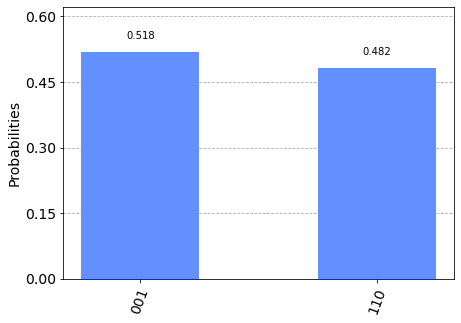

In [34]:
plot_histogram(execute(circuit2,simulator,shots=1024).result().get_counts(circuit2))

Job Status: job has successfully run


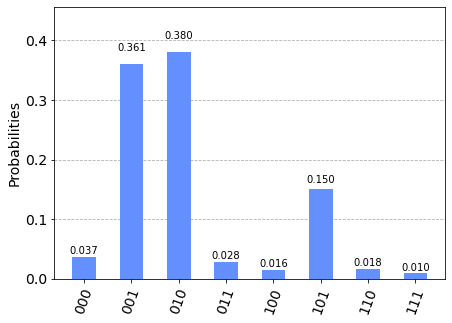

In [35]:
job= execute(circuit2, device, shots=1024)
job_monitor(job)
device_counts= job.result().get_counts(circuit2)
plot_histogram(device_counts)

In [36]:
device_mitigated_counts_2 = meas_filter.apply(device_counts)

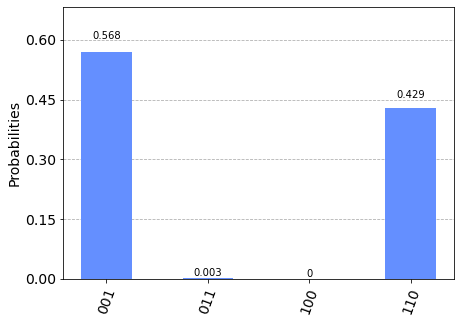

In [37]:
plot_histogram(device_mitigated_counts_2)

In [61]:
nqubits = 3
circuit = QuantumCircuit(nqubits,nqubits)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2],[0,1,2])

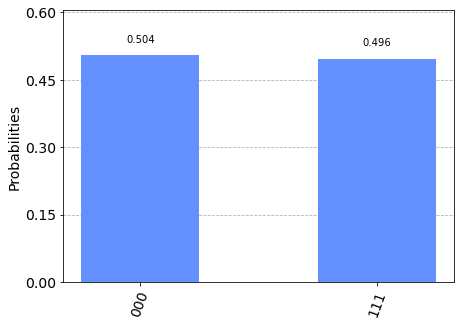

In [38]:
sim_counts=execute(circuit,simulator, shots=1024).result().get_counts(circuit)
plot_histogram(sim_counts)

Job Status: job has successfully run


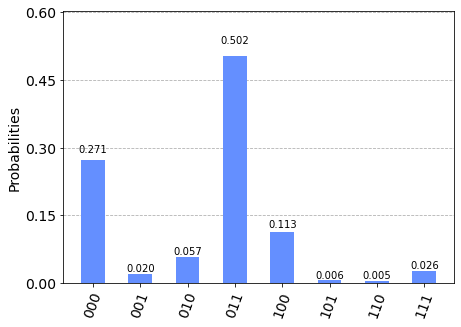

In [39]:
job=execute(circuit,device,shots=1024)
job_monitor(job)
job_counts=job.result().get_counts()
plot_histogram(job_counts)

In [40]:
cal_circuits , state_labels = complete_meas_cal(qr=circuit.qregs[0], circlabel= 'measerrormitigationcal')